In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/archive (5).zip',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [5]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [8]:
df.isnull().mean()*100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [9]:
X= df.drop(columns=['Survived'])
y= df['Survived']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [15]:
X_train


,Age,Fare
280,23.0,8.6625
284,2.0,20.2125
40,39.0,13.4167
17,21.0,7.2250
362,31.0,21.0000
...,...,...
299,29.0,7.8542
22,NaN,31.6833
72,29.0,7.9250
15,24.0,27.7208


In [16]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']


In [17]:
X_train.head()

,Age,Fare,Age_imputed
280,23.0,8.6625,23.0
284,2.0,20.2125,2.0
40,39.0,13.4167,39.0
17,21.0,7.2250,21.0
362,31.0,21.0000,31.0


In [18]:
X_test.head()

,Age,Fare,Age_imputed
146,NaN,51.8625,NaN
223,21.0,7.7958,21.0
193,61.0,12.3500,61.0
305,64.0,26.5500,64.0
188,NaN,69.5500,NaN


In [19]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


In [21]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([37.  , 21.  , 17.  , 42.  , 27.  , 36.  ,  0.75, 32.  , 18.  ,
       36.  , 59.  , 45.  , 30.  , 20.  , 29.  , 64.  , 35.  , 21.  ,
       18.  , 42.  , 31.  , 32.5 , 17.  , 41.  , 55.  ,  8.  , 25.  ,
       33.  , 29.  , 48.  , 25.  , 26.  , 23.  , 45.  , 60.5 ,  6.  ,
       19.  , 30.  , 47.  , 37.  , 22.  , 39.  , 28.  , 48.  , 50.  ,
       29.  , 24.  , 45.  , 25.  , 18.  , 20.  , 29.  , 45.  , 46.  ,
       24.  , 21.  , 32.  , 45.  , 28.5 , 33.  , 40.  , 49.  , 30.  ,
       24.  , 49.  , 53.  , 18.  , 23.  , 18.  , 30.  , 26.  , 21.  ])

In [22]:
X_train['Age'].isnull().sum()


72

In [23]:
X_train


,Age,Fare,Age_imputed
280,23.0,8.6625,23.0
284,2.0,20.2125,2.0
40,39.0,13.4167,39.0
17,21.0,7.2250,21.0
362,31.0,21.0000,31.0
...,...,...,...
299,29.0,7.8542,29.0
22,NaN,31.6833,29.0
72,29.0,7.9250,29.0
15,24.0,27.7208,24.0


<ipython-input-24-a4e9b458bbaf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-24-a4e9b458bbaf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


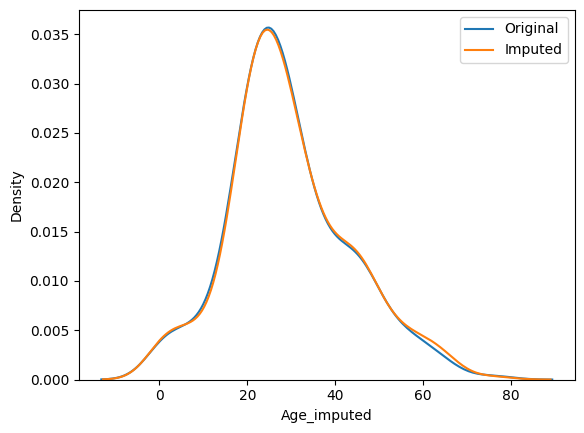

In [24]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()


In [25]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())


Original variable variance:  184.70402996695034
Variance after random imputation:  192.0737553325781


In [26]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2333.007047,216.034928,163.941095
Age,216.034928,184.704030,184.704030
Age_imputed,163.941095,184.704030,192.073755


<Axes: >

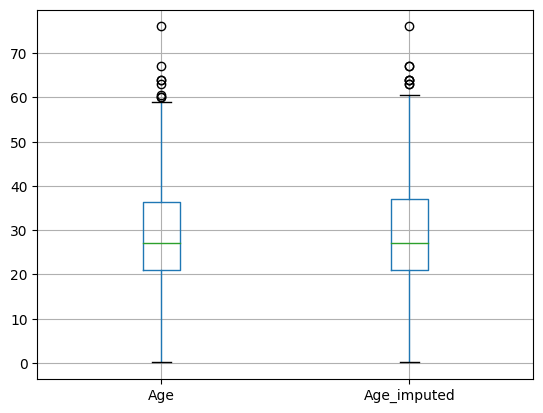

In [27]:
X_train[['Age', 'Age_imputed']].boxplot()


In [30]:

data = pd.read_csv('/content/train (2).csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [31]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [32]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [33]:
X_train.sample(5)


,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
651,Gd,Fa,108000,Fa,Gd
735,TA,TA,163000,TA,TA
1448,NaN,Fa,112000,Fa,NaN
413,Gd,TA,115000,TA,Gd
537,NaN,TA,111250,TA,NaN


In [34]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


<ipython-input-34-f5eeca8d3074>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-34-f5eeca8d3074>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-34-f5eeca8d3074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [35]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp


,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [36]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp


,original,imputed
Gd,0.494272,1.382775
TA,0.412439,1.150718
Fa,0.040917,0.119617
Po,0.027823,0.074163
Ex,0.024550,0.066986


<ipython-input-37-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-37-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

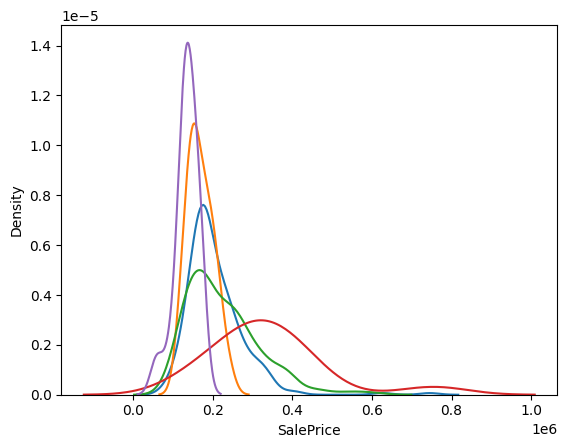

In [37]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()


<ipython-input-38-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-38-1d278de3936c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

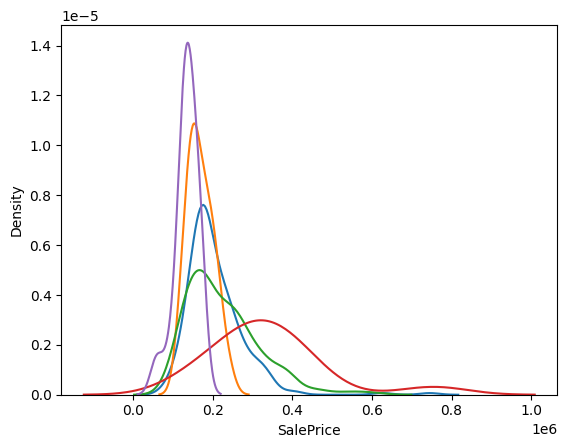

In [38]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()
